## Bike Sharing Demand Analysis

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline 
from dateutil.parser import parse

### Load and Look Into the Data

In [5]:
# load data from csv file
train_df = pd.read_csv("train.csv", header=0)

In [5]:
train_df.shape 

(10886, 12)

In [6]:
train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [7]:
train_df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [8]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
train_df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [10]:
sum(train_df.duplicated()) # number of duplicated day hour

0

In [7]:
# convert datetime column into multiple columns (year/month/day/hour/weekday)
dt = pd.to_datetime(train_df["datetime"]) # convert string to datetime type
train_df["year"] = dt.map(lambda x: x.year) 
train_df["month"] = dt.map(lambda x: x.month)
train_df["day"] = dt.map(lambda x: x.day)
train_df["hour"] = dt.map(lambda x: x.hour)
train_df["weekday"] = dt.map(lambda x: x.weekday())
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


In [12]:
train_df["season"].value_counts() # distribution of season
                                  # 1 = spring, 2 = summer, 3 = fall, 4 = winter 

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

In [13]:
train_df["weather"].value_counts()  # frequency of weather
                                    # 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
                                    # 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
                                    # 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
                                    # 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 


1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

### Exploratory Analysis and Visualization

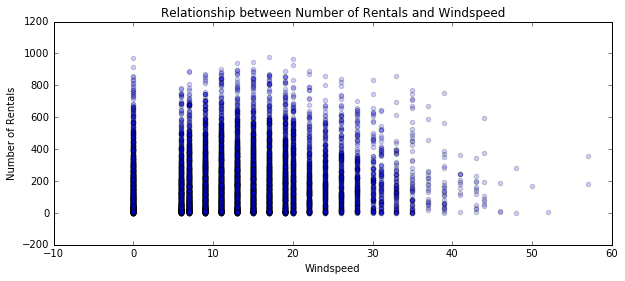

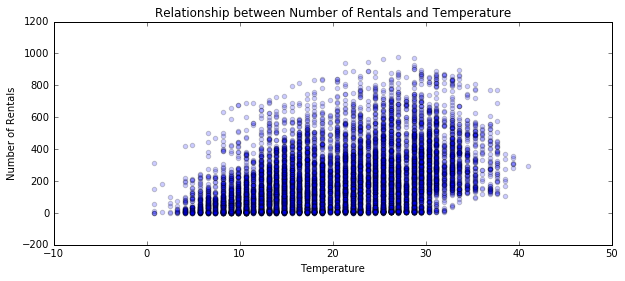

In [15]:
plt.subplots(figsize=(10, 4))
plt.scatter(train_df["windspeed"], train_df["count"], alpha = 0.2)
plt.xlabel("Windspeed")
plt.ylabel("Number of Rentals")
plt.title("Relationship between Number of Rentals and Windspeed")

plt.subplots(figsize=(10, 4))
plt.scatter(train_df["temp"], train_df["count"], alpha = 0.2)
plt.xlabel("Temperature")
plt.ylabel("Number of Rentals")
plt.title("Relationship between Number of Rentals and Temperature")
plt.show()

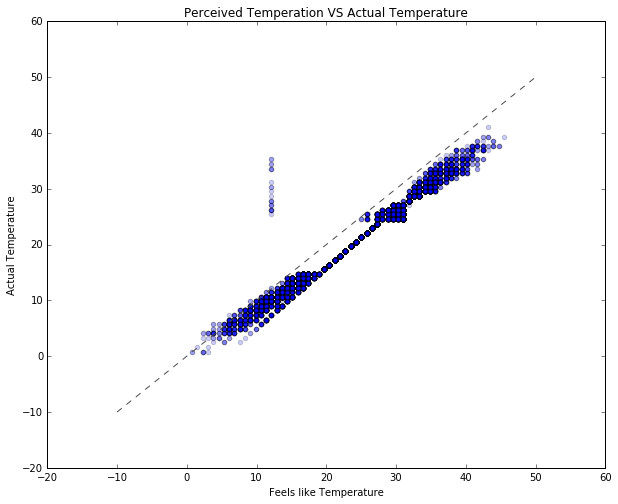

In [31]:
f, ax = plt.subplots(figsize=(10, 8))
ax.scatter(train_df["atemp"], train_df["temp"], alpha = 0.2)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3", color = "red")
ax.set_xlabel("Feels like Temperature")
ax.set_ylabel("Actual Temperature")
plt.title("Perceived Temperature VS Actual Temperature")
plt.show()

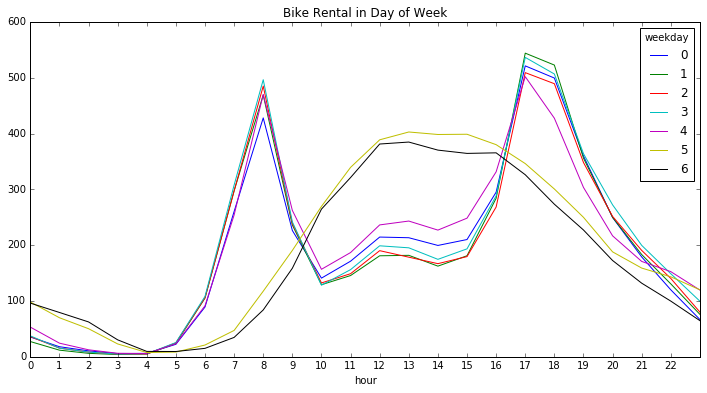

In [32]:
fig, axes = plt.subplots(1,1)
gp = train_df.groupby(["weekday", "hour"]).agg("mean")["count"].unstack("weekday") # group by weekday and hour
gp.plot(kind="line", ax=axes, figsize=(12,6), title="Bike Rental in Day of Week", xticks=range(0,23,1)) # plot
plt.show()

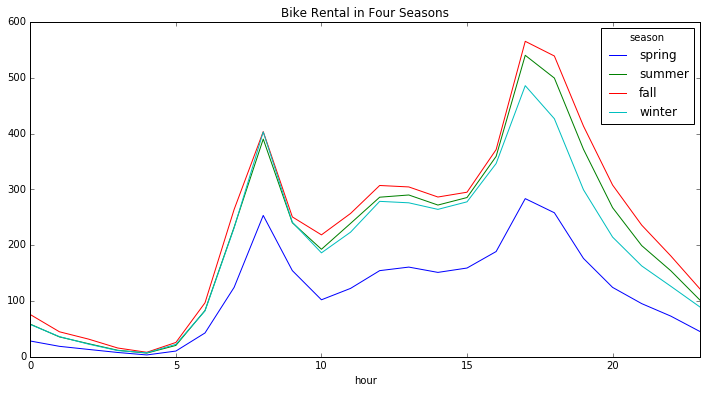

In [26]:
fig,axes = plt.subplots(1,1)
season_df = train_df.groupby(["season", "hour"]).agg("mean")["count"].unstack("season") # group by season and hour
season_df.rename(columns={1: "spring", 2: "summer", 3:"fall", 4: "winter"}, inplace=True) # rename the four seasons
season_df.plot(kind="line", ax=axes, figsize=(12,6),title="Bike Rental in Four Seasons") # plot
plt.show()

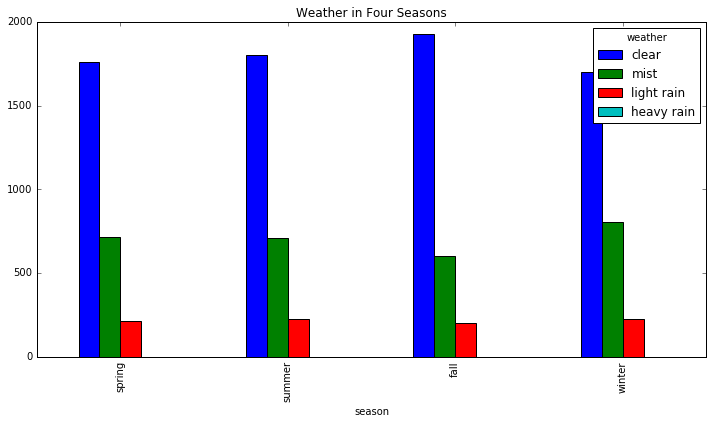

In [27]:
fig,axes = plt.subplots(1,1)
weather_df = train_df.groupby(["season", "weather"]).size().unstack()
weather_df.rename(index={1: "spring", 2: "summer", 3:"fall", 4: "winter"}, inplace=True)
weather_df.rename(columns={1: "clear", 2: "mist", 3:"light rain", 4: "heavy rain"}, inplace=True)
weather_df.plot(kind="bar", ax=axes, figsize=(12,6), title="Weather in Four Seasons")
plt.show()

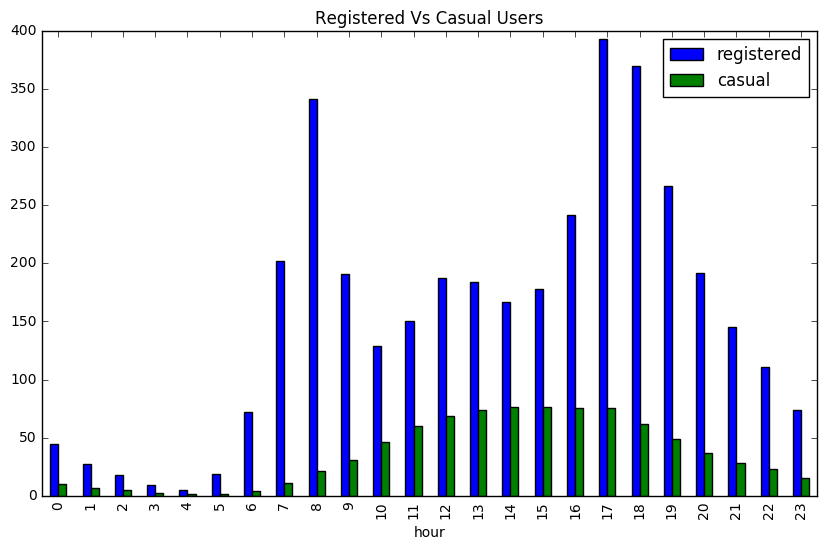

In [310]:
# casual and registered users
fig, axes = plt.subplots(1,1)
gp = train_df.groupby("hour").agg({"casual":"mean", "registered":"mean"})
gp.plot(kind="bar", ax=axes, figsize=(10,6), title="Registered Vs Casual Users")
plt.show()

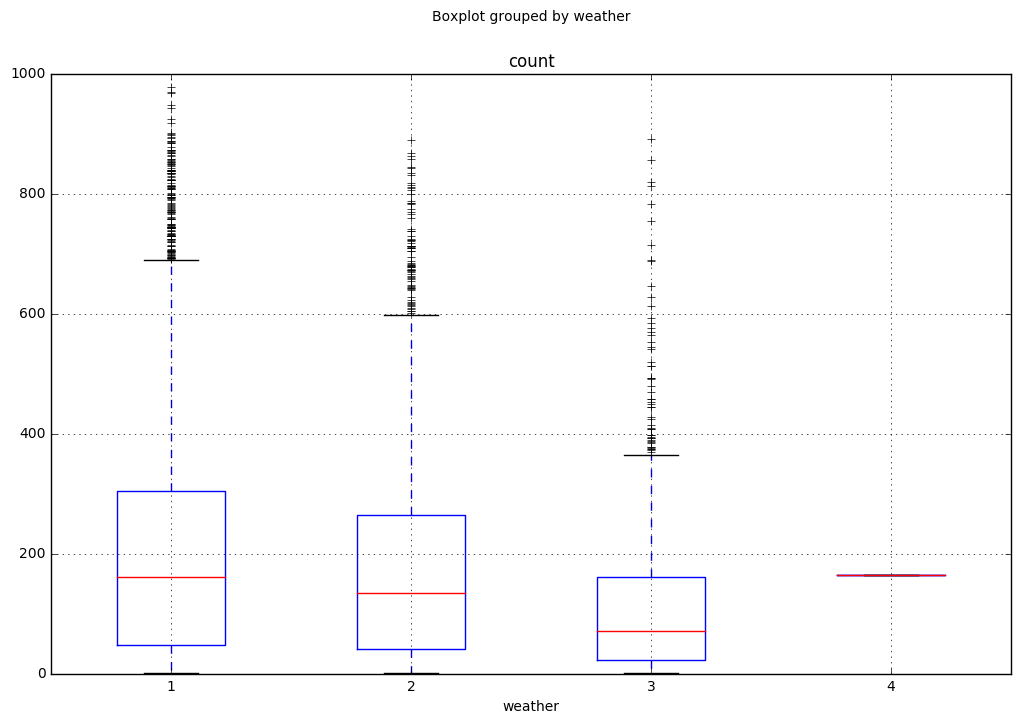

In [312]:
## how weather impacts the rental
                                    # 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
                                    # 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
                                    # 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
                                    # 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
train_df.boxplot(by="weather", column="count", figsize=(12,8))
plt.show()

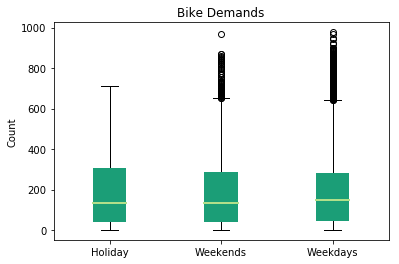

In [68]:
holiday = train_df.loc[train_df['holiday'] ==1, 'count']
weekends = train_df.loc[train_df["weekday"].isin([0,6]), 'count']
weekdays = train_df.loc[train_df['weekday'].isin([1,2,3,4,5]), 'count']
 
data_to_plot = [holiday, weekends, weekdays] 
bp = plt.boxplot(data_to_plot, patch_artist =True)
plt.ylabel ("Count")
plt.title("Bike Demands")

for box in bp['boxes']:
    box.set(color = 'none')
    box.set( facecolor = '#1b9e77' )

    
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2) 
    
ax = plt.axes( )   
ax.set_xticklabels(['Holiday', 'Weekends', 'Weekdays'])

ax.get_yaxis().tick_left()
plt.show()